___

# Allgemeine Hinweise zur Klausur 01882 **Data Engineering für Data Science**
> **_NOTE:_**  *Bitte lesen Sie sich diese Hinweise vor der Bearbeitung der Klausur aufmerksam durch.*

- Die **Klausurdauer** beträgt **2 Stunden**.
- Bevor Sie mit der Bearbeitung der Klausuraufgaben beginnen, tragen Sie bitte Ihre(n) **Nachnamen**, Ihre(n) **Vornamen** und Ihre **Matrikelnummer** in die vorgesehenen Felder (oben) ein.
- Wie schon in den Übungsaufgaben erfolgt die Bearbeitung in zwei unterschiedliche Zell-Typen: In **Code-Zellen** sollen Sie (Python-)Code (bei Bedarf kommentiert) einfügen und ausführen. In **Raw-Zellen** erwarten wir eine Antwort in Textform.
- Sollten bestimmte Fakten aus Ihrer Sicht nicht eindeutig formuliert sein, so schreiben Sie Ihre Annahmen zur Lösung dazu.
- Denken Sie bei Plots an Titel, Achsenbeschriftung und bei Bedarf Legende.
- Es empfiehlt sich, das Notebook, bzw. das daraus generierte PDF in regelmäßigen Abständen zu sichern. So müssen Sie nicht bei Null anfangen, sollte es unerwartetere Weise zu Software-Problemen kommen.
- Diese Klausur ist eine sogenannte "Open-Book-Klausur", was bedeutet, dass Sie alle Vorlesungsunterlagen, etc. als Hilfsmittel verwenden dürfen. Es ist jedoch ausdrücklich **verboten**, dass Sie untereinander kommunizieren oder andere Personen zu Rate ziehen. 

___

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import iplantuml
import plantuml
import numpy as np

# Marktanalyse
Ein fiktives Szenario: Die Geschwister Käfer besitzen bereits zwei Restaurants in der Stadt Pixhagen. Die beiden Restaurants laufen so gut, dass Sie überlegen, ob Sie ein neues Restaurant in Pixhagen eröffnen sollen und was für eine Art von Restaurant für die Pixhagener:innen von Interesse wäre. Für eine Marktanalyse schicken sie fünf Mitarbeiter:innen in die Stadt, um dort eine Umfrage durchzuführen. Am Tag nach der Umfrage werden Ihnen die Daten zur Verfügung gestellt. Dies ist der Inhalt der Klausur.

Folgende Dokumente stehen Ihnen zur Verfügung:
- *marktanalyse.csv* - Die Daten der Umfragen
- *informationen.pdf* - Informationen zu der fiktiven Stadt Pixhagen, den Geschwistern Käfer sowie der Umfrage und den Daten
- *umfrage.pdf* - Ein Muster des Umfragebogens, der den Mitarbeiter:innen zur Verfügung gestellt wurde
- *anmerkungen.pdf* - Die Anmerkungen zur Umfrage der fünf Mitarbeiter:innen

## Aufgabe 1 - Datenqualität (17 Punkte)
In der ersten Aufgabe geht es darum, sich mit den Daten vertraut zu machen und diese bzgl. ihrer Qualität zu analysieren.

### Aufgabe 1.1 Daten laden (1 Punkt)
*Laden Sie die Daten (`marktanalyse.csv`) in ein DataFrame namens `df`.*

In [3]:
# Ihre Lösung
df = pd.read_csv("./marktanalyse.csv", index_col=0)
df['MA'].value_counts()

MA
Sara Hofmann       121
Karin Storch       103
Layla Hawi         102
Oliver Gonzalez     99
Fadil Mebarek       96
Name: count, dtype: int64

### Aufgabe 1.2 Data Integrity (10 Punkte)
Machen Sie sich mit den Daten vertraut.

*Beurteilen Sie die Daten anhand der 5 Kriterien für **Data Integrity**, die Sie im Buch von McGregor in Kapitel 3 als **Important** kennengelernt haben.*

In [4]:
# Platz für Analysen

#initiale analyse
nr_rows = len(df)
nr_col = len(df.columns)
print("Der Datensatz hat "+str(nr_col)+" Spalten und "+str(nr_rows)+" Zeilen.")
print("Der Datensatz hat folgende Spalten: ")
display(list(df.columns))

print("Der Datensatz hat folgende informationen: ")
display(df.info())

Der Datensatz hat 8 Spalten und 521 Zeilen.
Der Datensatz hat folgende Spalten: 


['MA',
 'Geschlecht',
 'Stadtteil',
 'Ernaehrung',
 'Einkommen',
 'Budget',
 'Besuche',
 'Interesse']

Der Datensatz hat folgende informationen: 
<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 1 to 102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MA          521 non-null    object 
 1   Geschlecht  521 non-null    object 
 2   Stadtteil   521 non-null    object 
 3   Ernaehrung  518 non-null    object 
 4   Einkommen   210 non-null    float64
 5   Budget      521 non-null    float64
 6   Besuche     521 non-null    int64  
 7   Interesse   521 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 36.6+ KB


None

Passt die Größe des Samples?
Die Sample-größe ist 521

Ist die Anzahl Teilnehmer pro Stadtteil ähnlich?


Stadtteil
Nord    185
West    129
Süd     121
Ost      86
Name: count, dtype: int64

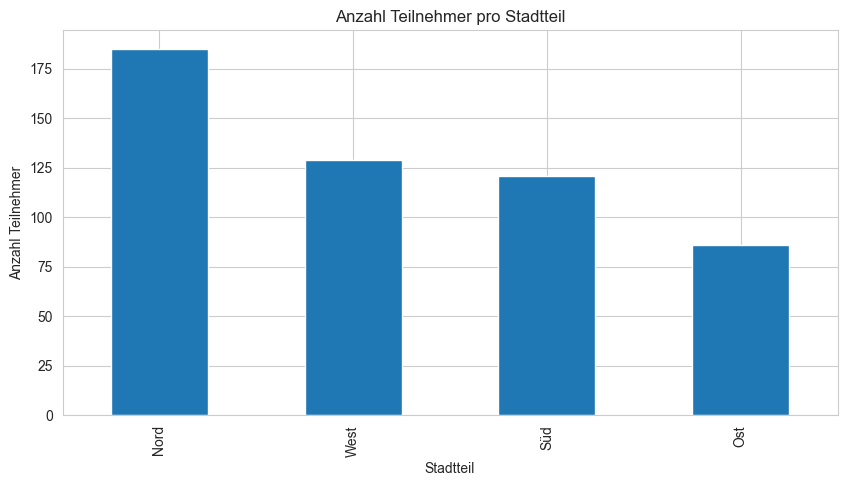

Von der Verteilung die man im Graph sieht, ist die Anzahl teilnehmer pro Stadtteil nicht fair verteilt. Vorallem ist da ein Unterschied zwischen dem östlichen und den nördlichen Stadtteil. Das könnte das Ergebnis beeinflussen.


In [5]:
# High volume: reicht das Volumen des Datensatzes aus, um die Hauptfrage zu beantworten?

print("Passt die Größe des Samples?")
print("Die Sample-größe ist "+str(nr_rows))

print("\nIst die Anzahl Teilnehmer pro Stadtteil ähnlich?")
display(df["Stadtteil"].value_counts(dropna=False))
df['Stadtteil'].value_counts().plot.bar(
    figsize=(10,5), 
    title="Anzahl Teilnehmer pro Stadtteil",
    xlabel="Stadtteil", 
    ylabel="Anzahl Teilnehmer")
plt.show()
print("Von der Verteilung die man im Graph sieht, ist die Anzahl teilnehmer pro Stadtteil nicht fair verteilt. Vorallem ist da ein Unterschied zwischen dem östlichen und den nördlichen Stadtteil. Das könnte das Ergebnis beeinflussen.")

In [6]:
#timely: sind die Daten auf dem neuesten Stand?
print("in den Unterlagen sowie in den Daten selber gibt es keine Information darüber wann diese Daten erfasst wurden. "
      +"Da die Daten auf Anfrage der Geschwister Käfer aufgefasst wurden sind, nehmen wir an, sie sind von neustem Stand.")

in den Unterlagen sowie in den Daten selber gibt es keine Information darüber wann diese Daten erfasst wurden. Da die Daten auf Anfrage der Geschwister Käfer aufgefasst wurden sind, nehmen wir an, sie sind von neustem Stand.


In [7]:
#Complete: Haben die für die Analyse erforderlichen Hauptmerkmale/-attribute fehlenden Werte?

#Sind alle Spalten von den Metadaten vorhanden?
print("Sind alle Spalten von den Metadaten vorhanden? "+str(nr_col==9))
display(df.columns)
print("Es fehlt die Spalte Nr die die Befragungsteilnehmer nummeriert und identifizierbar macht.")

Sind alle Spalten von den Metadaten vorhanden? False


Index(['MA', 'Geschlecht', 'Stadtteil', 'Ernaehrung', 'Einkommen', 'Budget',
       'Besuche', 'Interesse'],
      dtype='object')

Es fehlt die Spalte Nr die die Befragungsteilnehmer nummeriert und identifizierbar macht.


In [8]:
#Gibt es fehlende Daten?
check = df.isnull()
print("Gibt es fehlende Daten? "+str(check.values.any()))

if(check.values.any()):
    print("Es gibt fehlende Daten und die sind verteilt wie folgt: ")
    print("Sum of all Nans? "+str(check.values.sum())); 
    print("Sum of Nans per column? \n"+str(check.sum()))
    print("count of existing values is "+str(df.count().sum()))



Gibt es fehlende Daten? True
Es gibt fehlende Daten und die sind verteilt wie folgt: 
Sum of all Nans? 314
Sum of Nans per column? 
MA              0
Geschlecht      0
Stadtteil       0
Ernaehrung      3
Einkommen     311
Budget          0
Besuche         0
Interesse       0
dtype: int64
count of existing values is 3854


In [9]:
#Multivariat:Wird zu jedem Datensatz mehrere Attribute oder Merkmale zugeordnet?

#Spalten sehen
print("Multivariat: Wird zu jedem Datensatz mehrere Attribute oder Merkmale zugeordnet?")
print("Anzahl Attribute für jeden Datensatz ist "+str(nr_col))

Multivariat: Wird zu jedem Datensatz mehrere Attribute oder Merkmale zugeordnet?
Anzahl Attribute für jeden Datensatz ist 8


In [10]:
print("Anzahl fehlende Werte in der Spalte 'Einkommen': "+str(df['Einkommen'].isna().sum()))
print("Wie wir aus der Ausgabe sehen können, die überwiegende Mehrheit der Teilnehmer wollten nicht ihre Jahreseinkommen angeben. Dies wirft die Frage auf, wie nützlich diese Spalte wirklich ist.")
print("Der Budget ist ein gutes Indikator für den Einkommen der Teilnehmer.")

Anzahl fehlende Werte in der Spalte 'Einkommen': 311
Wie wir aus der Ausgabe sehen können, die überwiegende Mehrheit der Teilnehmer wollten nicht ihre Jahreseinkommen angeben. Dies wirft die Frage auf, wie nützlich diese Spalte wirklich ist.
Der Budget ist ein gutes Indikator für den Einkommen der Teilnehmer.


In [11]:
# atomic: Sind die daten granular? Gibt es zusammenfassenden Statistiken, kombinierte Daten oder Kennzahlen?
print("In der Umfrage wurde nur ermittelt, ob die Teilnehmer in einem der Restaurants war oder in keinem der beiden, aber nicht in beide.")
display(df["Besuche"].value_counts())
display(df["Ernaehrung"].value_counts(dropna=False))


In der Umfrage wurde nur ermittelt, ob die Teilnehmer in einem der Restaurants war oder in keinem der beiden, aber nicht in beide.


Besuche
0    244
1    158
2    119
Name: count, dtype: int64

Ernaehrung
vegetarisch    243
alles          217
vegan           53
frugan           5
NaN              3
Name: count, dtype: int64

### Aufgabe 1.3 Data Fit (4 Punkte)
*Beurteilen Sie, ob die Daten Ihrer Meinung nach geeignet sind, um eine Entscheidung über ein neues Restaurant zu treffen. Welche Informationen aus den Daten sind hilfreich und welche nicht? Welche weiteren Informationen wären ggf. notwendig?*

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 1 to 102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MA          521 non-null    object 
 1   Geschlecht  521 non-null    object 
 2   Stadtteil   521 non-null    object 
 3   Ernaehrung  518 non-null    object 
 4   Einkommen   210 non-null    float64
 5   Budget      521 non-null    float64
 6   Besuche     521 non-null    int64  
 7   Interesse   521 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 36.6+ KB


None

array([[<Axes: title={'center': 'Budget'}>]], dtype=object)

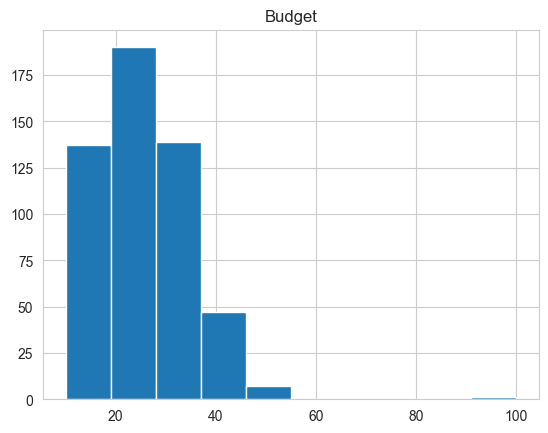

In [12]:
# Platz für Analysen
#1. Validity: Haben die Daten den richtigen Typ, das richtige Format und den richtigen Bereich?
#Typ der Daten
display(df.info())
#Format der Daten
df.head()

#Bereich der Daten: gibt es Ausreißer?
df.hist('Budget')

In [13]:
#2. Reliability: Zuverlässigkeit beschreibt die Genauigkeit und Stabilität des Datensatzes?

df["Interesse"].value_counts(dropna=False)

Interesse
1    352
0    169
Name: count, dtype: int64

In [14]:
#3. Representativeness: ob diese Erkenntnisse ein genaues Porträt einer bestimmten Situation oder Bevölkerung sind

### Aufgabe 1.4 Repräsentativität (2 Punkte)
*Welche Informationen aus dem Datensatz können verwendet werden, um einzuschätzen, wie repräsentativ der Datensatz ist? Nennen Sie zudem **mindestens eine** weitere Information, die bisher nicht in den Daten enthalten ist, aber die hilfreich wäre, um die Repräsentativität besser beurteilen zu können.*

In [15]:
# Platz für Analysen


## Aufgabe 2 - Datenvorverarbeitung (22 Punkte)
Die zweite Aufgabe beschäftigt sich mit der Datenvorverarbeitung.

### Aufgabe 2.1 Plausibilitätschecks (6 Punkte)

Entsprechend der Anmerkungen der Mitarbeiter:innen sind verschiedene Plausibilitätschecks der Daten denkbar. Bei diesen Checks wird geprüft, ob sich die Aussagen der Mitarbeiter:innen in den Daten wiederspiegeln.

*Führen Sie drei Plausibilitätschecks Ihrer Wahl durch. Geben Sie bei jedem Check an, auf welche Aussage Sie sich beziehen und, ob der Check fehlgeschlagen ist oder nicht.*

In [16]:
# Ihre Lösung

### Aufgabe 2.2 Theoretische Überlegungen (2 + 2 Punkte)

Zunächst werden die Spalten `Besuche` und `Budget` betrachtet.

Die Spalte `Besuche` ist numerisch codiert. 

*Erläutern Sie (**nur beschreiben, kein Code erforderlich!**), inwiefern dies zu Problemen führen könnte. (2 Punkte)*

In der Spalte `Budget` gibt es einen Ausreißer:

<Axes: >

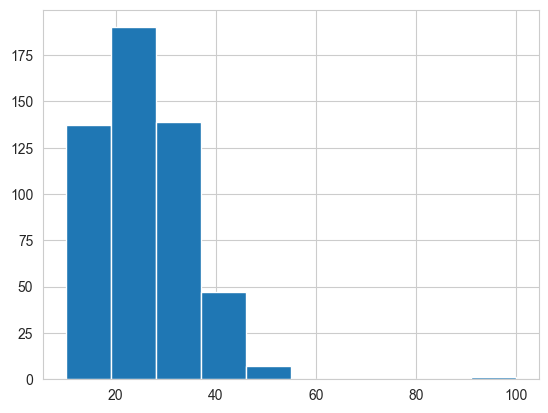

In [17]:
df.Budget.hist()

*Beschreiben Sie (**nur beschreiben, kein Code erforderlich!**), wie Sie mit diesem Ausreißer umgehen würden. (2 Punkte)*

### Aufgabe 2.3 Praktische Anwendung (12 Punkte)
Das Ziel der Geschwister Käfer ist es, wie oben beschrieben, herauszufinden, ob Interesse an einem neuen Restaurant vorhanden ist. Und falls Interesse da ist, sollen mithilfe der Umfrageergebnisse weitere Informationen ermittelt werden, welche Art von Restaurant am gefragtesten wäre. Für eine sinnvolle Analyse sind diverse Vorverarbeitungsschritte notwendig. 

*Führen Sie Vorverarbeitungsmaßnahmen durch, die Ihrer Meinung nach nötig sind, um die Qualität der Daten zu verbessern. Begründen Sie für jede Maßnahme Ihr Vorgehen.*


>> **Achtung**: *Da die Spalten `Besuche` und `Budget` bereits in den vorherigen Aufgaben theortetisch diskutiert wurden, sind sie deshalb aus Zeitgründen für diese Aufgabe nicht relevant. Zudem ist eine **Umbenennung** von Spalten aus Zeitgründen ebenfalls nicht notwendig!*

In [18]:
# Ihre Lösung

## Aufgabe 3 - Datenanalyse (16 Punkte)
In dieser Aufgabe werden Analysen auf den Daten ausgeführt.

### Aufgabe 3.1 (6 Punkte)
*Ermitteln Sie folgende Informationen:*
- Wie ist das durchschnittliche Interesse nach Ernaerhung? Bei welcher Gruppe ist das Interesse am höchsten und bei welcher am niedrigsten? (2 Punkte)
- Aus welchem Stadtteil stammen die meisten der befragten Personen?  (2 Punkte)
- Welches der beiden bereits existierenden Restaurant wurde bisher am häufigsten von Bewohner:innen der Weststadt besucht?  (2 Punkte)

*Interpretieren Sie die Aussage Ihres Codes, indem Sie die Antwort auf die jeweilige Frage in die dafür vorgesehene Raw-Zelle schreiben. Schätzen Sie dabei für jede Frage die Aussagekraft der Ergebnisse ein.*

In [19]:
# Wie ist das durchschnittliche Interesse nach Ernaerhung? (nur Code)
avg_interest = df.groupby('Ernaehrung')['Interesse'].mean()
display(avg_interest)
# Bei welcher Gruppe ist das Interesse am höchsten und bei welcher am niedrigsten? (Antwort in Raw-Zelle)
print("Am höchsten interessiert ist die Gruppe "+str(avg_interest.idxmax()))
print("Am niedrigsten interessiert ist die Gruppe "+str(avg_interest.idxmin()))

Ernaehrung
alles          0.608295
frugan         0.600000
vegan          0.735849
vegetarisch    0.720165
Name: Interesse, dtype: float64

Am höchsten interessiert ist die Gruppe vegan
Am niedrigsten interessiert ist die Gruppe frugan


In [20]:
# Aus welchem Stadtteil stammen die meisten der befragten Personen? 
df["Stadtteil"].value_counts().idxmax()

'Nord'

In [21]:
# Welches der beiden bereits existierenden Restaurant wurde bisher am häufigsten von Bewohner:innen der Weststadt besucht?
df["Besuche"].value_counts()

west = df[df["Stadtteil"]=="West"]
display(west)
west[west["Besuche"]!=0]["Besuche"].value_counts().idxmax()

,MA,Geschlecht,Stadtteil,Ernaehrung,Einkommen,Budget,Besuche,Interesse
Nr.,,,,,,,,
5,Sara Hofmann,m,West,vegan,53120.0,27.0,0,1
19,Sara Hofmann,f,West,vegetarisch,NaN,28.0,1,1
21,Sara Hofmann,m,West,vegetarisch,NaN,29.0,1,1
43,Sara Hofmann,f,West,vegetarisch,NaN,22.0,1,1
61,Sara Hofmann,m,West,vegetarisch,NaN,29.0,1,1
...,...,...,...,...,...,...,...,...
81,Layla Hawi,m,West,alles,0.0,35.0,0,1
85,Layla Hawi,m,West,alles,0.0,28.0,2,1
87,Layla Hawi,w,West,vegetarisch,0.0,25.0,0,1


1

### Aufgabe 3.2 (4 Punkte)
Gibt es einen Unterschied in der Ernährungsweise je nach Stadtteil? 

*Beantworten Sie die Frage mithilfe von Kreisdiagrammen. Denken Sie dabei an Titel und Legende sowie die Interpretation des Diagramms.*

In [22]:
data = df.groupby(['Ernaehrung','Stadtteil']).size().unstack('Stadtteil')
display(data)
data.sum()

Stadtteil,Nord,Ost,Süd,West
Ernaehrung,,,,
alles,17.0,36.0,95.0,69.0
frugan,NaN,NaN,NaN,5.0
vegan,22.0,21.0,NaN,10.0
vegetarisch,145.0,29.0,26.0,43.0


Stadtteil
Nord    184.0
Ost      86.0
Süd     121.0
West    127.0
dtype: float64

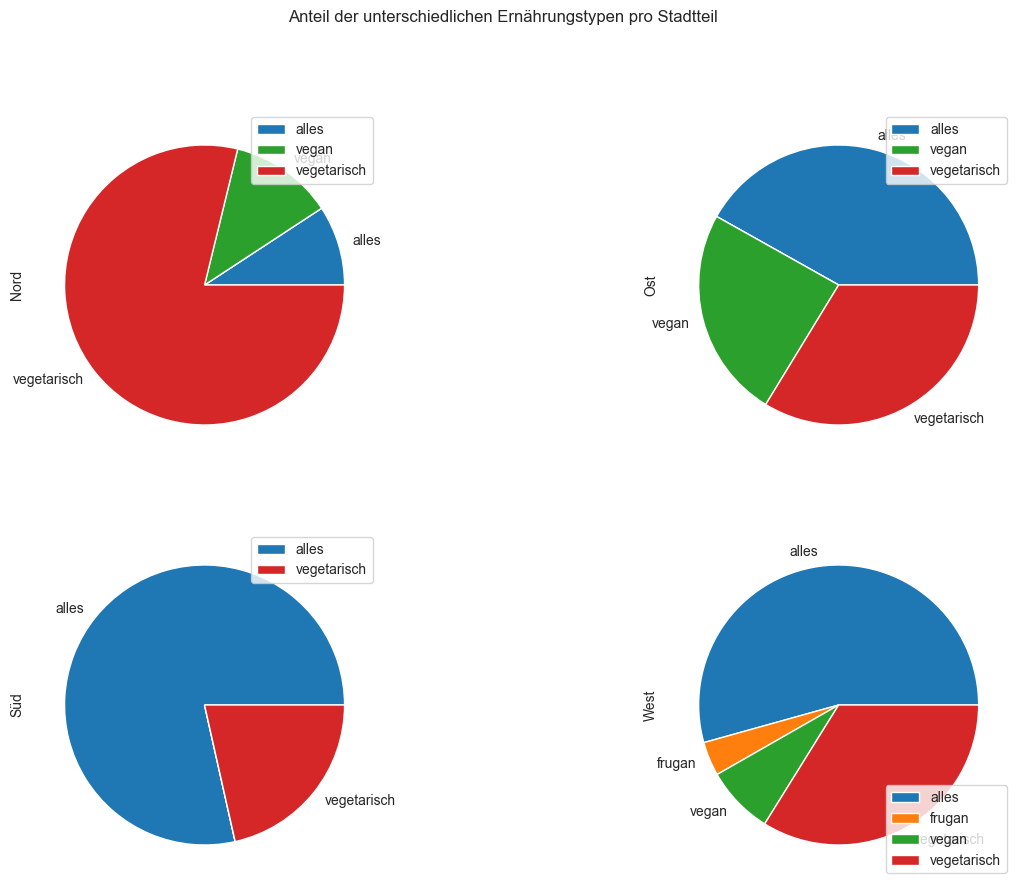

In [23]:
# Ihre Lösung
# Ihre Lösung
def absolute_value(val):
    a  = np.round(val/data.sum()*100, 0)
    return a


data.plot(kind="pie", 
figsize=(15,10), 
layout=(2, 2),
title="Anteil der unterschiedlichen Ernährungstypen pro Stadtteil",
#autopct = absolute_value,
subplots=True)

plt.show()

### Aufgabe 3.3 (4 Punkte)
Gibt es bzgl. des durchschnittlichen Interesses an einem neuen Restaurant einen großen Unterschied in Abhängigkeit der Stadtteile?

*Beantworten Sie die Frage mithilfe eines Säulendiagramms. Denken Sie dabei an Titel und Achsenbeschriftung sowie die Interpretation des Diagramms.*

,Stadtteil,Interesse
0,Nord,0.756757
1,Ost,0.767442
2,Süd,0.504132
3,West,0.658915


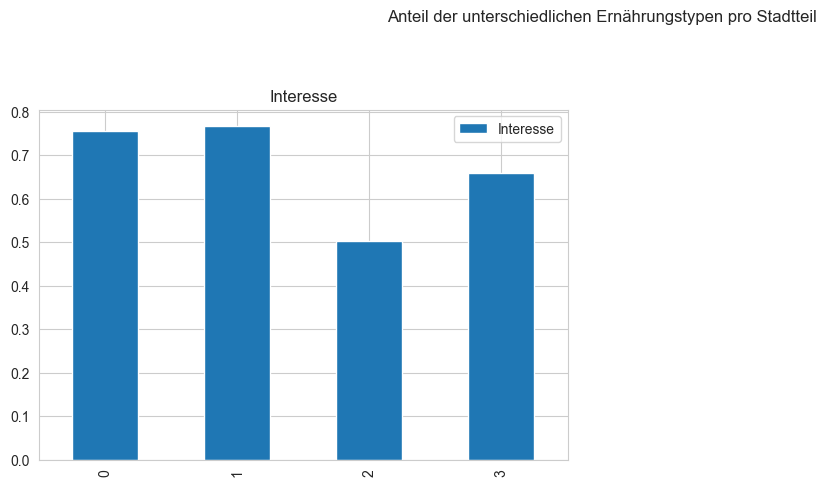

In [24]:
# Ihre Lösung
#interesse = df.groupby(['Interesse','Stadtteil']).size().unstack('Stadtteil')
#display(interesse)
data2 = df.groupby('Stadtteil')["Interesse"].mean().reset_index()
display(data2)
data2.plot(kind="bar", 
figsize=(15,10), 
layout=(2, 2),
title="Anteil der unterschiedlichen Ernährungstypen pro Stadtteil",
#autopct = absolute_value,
subplots=True)

plt.show()

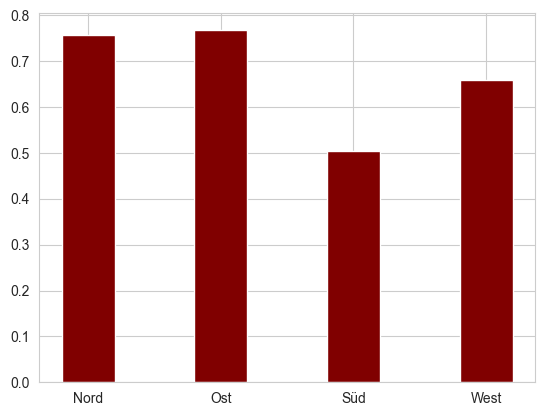

<Figure size 1000x500 with 0 Axes>

In [223]:
plt.bar(data2["Stadtteil"], data2['Interesse'], color ='maroon', width = 0.4)
 
fig = plt.figure(figsize = (10, 5))

#plt.xlabel("Department")
#plt.ylabel("Anzahl Angestellte")
#plt.title("Anzahl Angestellte pro Department")
plt.show()

### Aufgabe 3.4 (2 Punkte)
*Entsprechend Ihrer Analysen: Wenn ein neues Restaurant eröffnet werden soll, welchen Stadtteil würden Sie empfehlen und welche Hinweise würden Sie für die Ausrichtung der Speisekarte entsprechend der Ernährungsweise geben? Nehmen Sie für diese Aufgabe an, dass Sie eine Entscheidung treffen müssen und es aus Zeit- und Kostengründen keine Option ist, weitere Informationen (z.B. durch eine erneute Umfrage) einzuholen.*

## Aufgabe 4 - Big Data Analysis (15 Punkte)
In diesem Aufgabenbereich geht es um Hadoop und Spark.

### Aufgabe 4.1 Hadoop Map Reduce vs. Spark (2 + 1 Punkte)
*Beschreiben Sie die Unterschiede zwischen der Verarbeitung der Tasks von Hadoop MapReduce und von Spark. (2 Punkte)*

*Welche Vorteile ergeben sich daraus bei der Arbeit mit Spark? (1 Punkt)*

### Aufgabe 4.2 Eigenschaften RDDs (8 Punkte)
Nennen Sie vier der fünf wichtigsten Eigenschaften von RDDs. Beschreiben Sie für jede Eigenschaft mit einem kurzen Satz, warum sie von Bedeutung ist.

### Aufgabe 4.3 Ressourcenvebrauch (4 Punkte)
Gegeben sei folgender Auszug aus der Datei `spark-defaults.conf`:

```
spark.executor.instances 3
spark.executor.memory 1G
spark.executor.cores 2
spark.executor.memoryOverhead 512M

spark.yarn.am.cores 1
spark.yarn.am.memory 2G
spark.yarn.am.memoryOverhead 512M

spark.dynamicAllocation.enabled false
```

Ein pyspark-Shell wird mit folgendem Aufruf gestartet:
`pyspark --master yarn`

Gehen Sie davon aus, dass im Cluster genügend freie Ressourcen zur Verfügung stehen, um die Anfragen des Application Masters zu erfüllen.

*Berechnen Sie den Ressourcen-Verbrauch (Memory und Cores) der Spark-Anwendung. Geben Sie dabei Ihren Rechenweg an.*

## Aufgabe 5 - Modellierung, NoSQL (25 Punkte)

### Aufgabe 5.1 (2 Punkte)

Beschreiben Sie Anwendungseigenschaften bzw. Charakteristika, die eher für die Verwendung eines dokumentorientierten bzw. spaltenorientierten Datenbanksystems sprechen.

### Aufgabe 5.2 (2 Punkte)

Embedded vs. referentielle Modellierung bei dokumentorientierten Datenbanksystemen wie MongoDB.

Sie möchten aus Eigenschaften der Anwendung bzw. der Abfragen schlussfolgern, welche Art der Modellierung (embedded oder referenziell) Sie wählen sollen. Geben Sie Modellierungsrichtlinien bzw. Anwendungscharakteristika an, die einen starken Einfluss auf die Auswahl der Modellierung haben.

### Aufgabe 5.3 (21 Punkte)

In einem dokumentenorientierten NoSQL-Datenbanksystem sollen Kunden, Produkte und Bestellungen gespeichert werden. Dabei können pro Bestellung **mehrere Produkte in unterschiedlicher Anzahl** bestellt werden. Außerdem können Kunden Reviews zu den bestellten Produkten abgeben.


Geplante Abfragen:

- Es können neue Produkte hinzugefügt werden.
- Die Preise der Produkte können verändert werden.
- Produkte können entfernt werden.
- Neue Kunde können angelegt werden.
- Es kann nach Produkten gesucht werden. Zu den Produkten werden neben den Produktinformationen ebenfalls die 10 neuesten Reviews angezeigt.
- Ein Kunde kann eine neue Bestellung aufgeben.
- Ein Kunde kann Reviews über gekaufte Produkte schreiben.
- Ein Kunde kann sich seine  Bestellungen innerhalb eines bestimmten Zeitraums anzeigen lassen. Das Gleiche gilt für Reviews.


1. Erstellen Sie zunächst ein plattformunabhängiges (konzeptionelles) Modell (dieses Modell enthält noch keine Fremdschlüssel, Einbettungen und Datentypen). Modellieren Sie außerdem folgende Attribute: Kunden haben einen Namen und Vornamen. Bestellungen haben ein Datum. Produkte haben einen Titel, einen Preis und eine Beschreibung. Reviews enthalten den Text und ein Datum.
2. Skizzieren Sie anschließend ein geeignetes Datenmodell für die Speicherung in einem dokumentenorientierten Datenbanksystem. Begründen Sie ihre Entscheidungen für Referenzierungen, Einbettungen und redundante Speicherung bzw. Einbettung. Heben Sie redundante- und Fremdschlüssel-Attribute farblich hervor.

[example here](https://i.stack.imgur.com/mNgza.png)

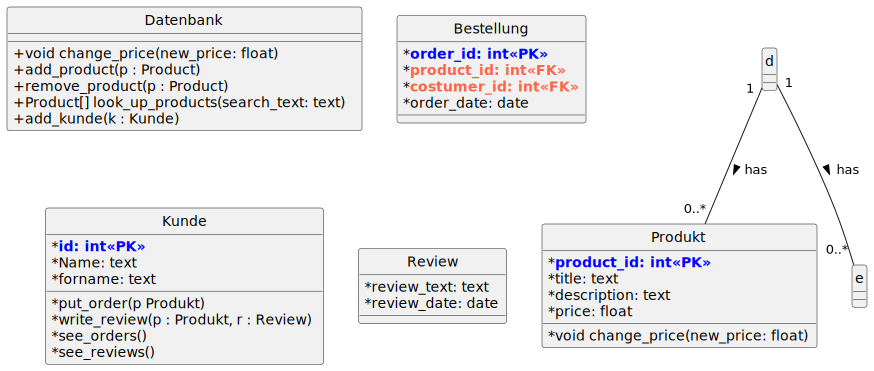

In [52]:
%%plantuml
@startuml

hide circle
show members
show fields

skinparam classAttributeIconSize 0

class "Datenbank" as db {
    + void change_price(new_price: float)
    + add_product(p : Product)
    + remove_product(p : Product)
    + Product[] look_up_products(search_text: text)
    + add_kunde(k : Kunde)
}

class "Produkt" as p {
    * <color:blue>**product_id: int<<PK>>**</color>
    * title: text
    * description: text
    * price: float
    * void change_price(new_price: float)
}

class "Bestellung" as b {
    * <color:blue>**order_id: int<<PK>>**</color>
    * <color:Tomato>**product_id: int<<FK>>**</color>
    * <color:Tomato>**costumer_id: int<<FK>>**</color>
    * order_date: date
}

class "Kunde" as k {
    * <color:blue>**id: int<<PK>>**</color>
    * Name: text
    * forname: text
    * put_order(p Produkt)
    * write_review(p : Produkt, r : Review)
    * see_orders()
    * see_reviews()
}

class "Review" as r {
    * review_text: text
    * review_date: date
}

d "1" -- "0..*" e : has >
d "1" -- "0..*" p : has >

@enduml

## Aufgabe 6 - Technologien für Big Data (5 Punkte)

### Aufgabe 6.1 (2 Punkte)
Warum eignen sich spaltenorientierte Datenbanksysteme sehr gut für analytische Anwendung wie beispielsweise Data Warehouses?

### Aufgabe 6.2 (1 Punkt)
In einer Tabelle `Verkauf` mit Verkaufsdaten ist jeder Datensatz (jede Zeile) im Mittel 100 Bytes lang. Das Attribut `Filiale` belegt 5 Bytes. Wieviel Prozent der Daten müssen bei einer spaltenorientierten Speicherung im Vergleich zu einer zeilenorientierten Speicherung gelesen werden, wenn die folgende SQL-Query ausgeführt wird?

`SELECT Filiale, COUNT(*) FROM Verkauf GROUP BY Filiale;`

### Aufgabe 6.3 (2 Punkte)
Angenommen, Sie verwenden in einem Cluster mit *n* Servern für die Zuordnung der Daten mit Key *k* die Hashfunktion *k mod n*. Welche Probleme würden in diesem Szenario auftreten?